In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Charger les données à partir d'un fichier Excel
fichier_excel = 'BAISSER LE RENDEMENT.xlsx'
data = pd.read_excel(fichier_excel)

In [3]:
data.head()  # Affiche les 5 premières lignes du DataFrame

,Date,CP DU GOM,FLASH DU KEROSENE,PC DU KEROSENE,Densité de Fond C01,Rendement du Bleed
0,2024-01-07,-16.0,27.0,-74.0,799.724410,48.142800
1,2024-01-08,-16.0,28.0,-74.0,782.912548,26.299940
2,2024-01-09,-34.0,21.0,-74.0,758.117468,28.945648
3,2024-01-10,5.0,48.0,-59.0,739.248178,11.380420
4,2024-01-11,2.0,22.0,-74.0,727.942915,78.500000


In [4]:
# Vérifier combien de valeurs manquantes il y a dans chaque colonne
print(data.isnull().sum())

Date                   0
CP DU GOM              5
FLASH DU KEROSENE      7
PC DU KEROSENE         6
Densité de Fond C01    0
Rendement du Bleed     0
dtype: int64


In [5]:
# Supprimer les lignes contenant des valeurs manquantes
data = data.dropna()

In [6]:
data['Rendement du Bleed'].describe()

count    149.000000
mean      16.568020
std       16.362182
min        0.125682
25%        7.759413
50%       10.286098
75%       15.904781
max       78.500000
Name: Rendement du Bleed, dtype: float64

In [7]:
# Vérifier combien de valeurs manquantes il y a dans chaque colonne
print(data.isnull().sum())

Date                   0
CP DU GOM              0
FLASH DU KEROSENE      0
PC DU KEROSENE         0
Densité de Fond C01    0
Rendement du Bleed     0
dtype: int64


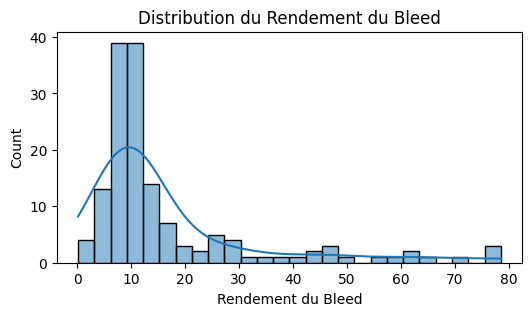

In [8]:
 #3. Analyse exploratoire des données
# Distribution des variables
plt.figure(figsize=(6, 3))
sns.histplot(data['Rendement du Bleed'], kde=True)
plt.title('Distribution du Rendement du Bleed')
plt.show()

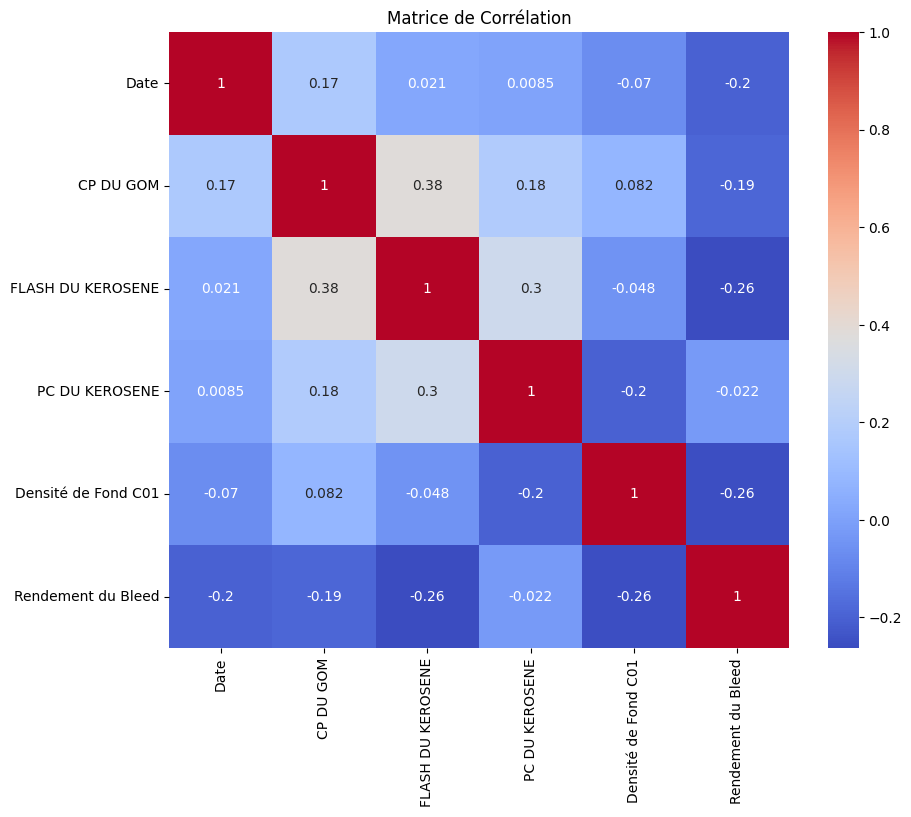

In [9]:
# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

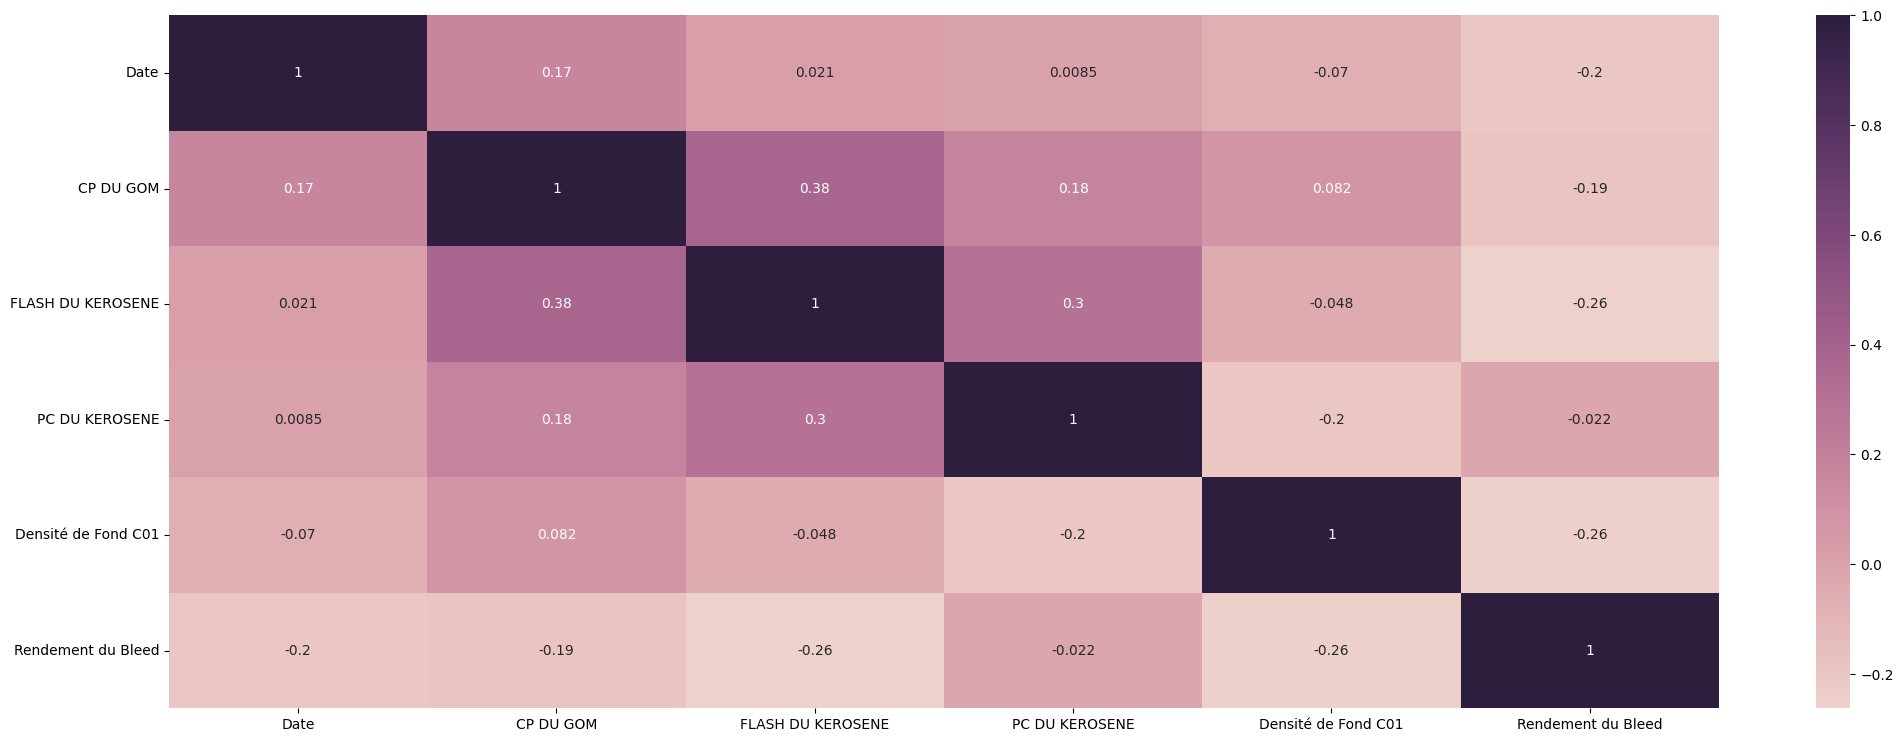

In [10]:
#Correlation entre les variables quantitaitves
plt.figure(figsize=(25, 9))
ax=sns.heatmap(data.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

# 4. Modélisation

In [11]:

# Séparation des variables indépendantes et dépendantes


In [12]:
#Récuperer la variable des segments
y = data['Rendement du Bleed']
#Supprimer les variables inutiles 
x=data.drop(columns=['Rendement du Bleed','Date'], axis=1)
# Séparer les données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0,test_size=0.2, train_size=0.8) 

# 4.1. Régression linéaire multiple

In [13]:
# 4.1. Régression linéaire multiple
lin_reg = LinearRegression()


In [14]:
X_train.isnull().sum()

CP DU GOM              0
FLASH DU KEROSENE      0
PC DU KEROSENE         0
Densité de Fond C01    0
dtype: int64

In [15]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)

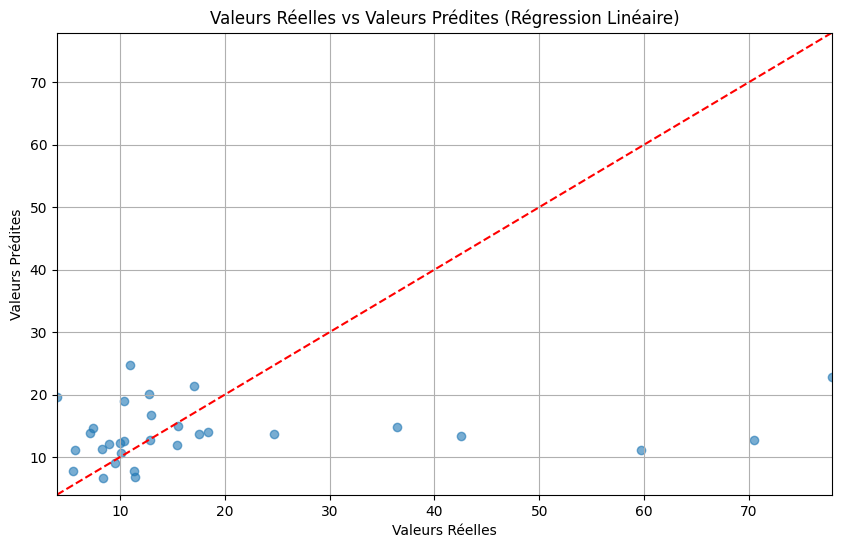

Mean Squared Error: 366.79242422567665


In [17]:
# Créer un graphique de dispersion des valeurs réelles vs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lin, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ligne d'identité
plt.title('Valeurs Réelles vs Valeurs Prédites (Régression Linéaire)')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.grid()
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.show()

# Affichage de l'erreur quadratique moyenne
print(f"Mean Squared Error: {mse_lin}")

### 4.2. Régression polynomiale

In [18]:
# 4.2. Régression polynomiale
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
y_pred_poly = poly_reg.predict(poly.transform(X_test))
mse_poly = mean_squared_error(y_test, y_pred_poly)

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Supposons que X_train et y_train contiennent une seule caractéristique
# Transformer les données d'entraînement pour la régression polynomiale
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Ajuster le modèle de régression polynomiale
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

# Prédire les valeurs pour les données de test
y_pred_poly = poly_reg.predict(poly.transform(X_test))
mse_poly = mean_squared_error(y_test, y_pred_poly)

# Pour tracer la courbe de régression, nous allons créer une plage de valeurs pour X
X_grid = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)  # Créer un vecteur de 100 points
X_grid_poly = poly.transform(X_grid)  # Transformer les valeurs

# Prédictions pour la courbe
y_grid_pred = poly_reg.predict(X_grid_poly)

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Valeurs Réelles', alpha=0.6)  # Valeurs réelles
plt.plot(X_grid, y_grid_pred, color='red', label='Régression Polynomiale', linewidth=2)  # Courbe de régression
plt.title('Régression Polynomiale (degré 2)')
plt.xlabel('Variable Indépendante')
plt.ylabel('Variable Dépendante')
plt.legend()
plt.grid()
plt.show()

# Affichage de l'erreur quadratique moyenne
print(f"Mean Squared Error: {mse_poly}")


C:\Users\odeto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but PolynomialFeatures is expecting 4 features as input.

### 4.3. Forêt Aléatoire

In [26]:
# 4.3. Forêt Aléatoire
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

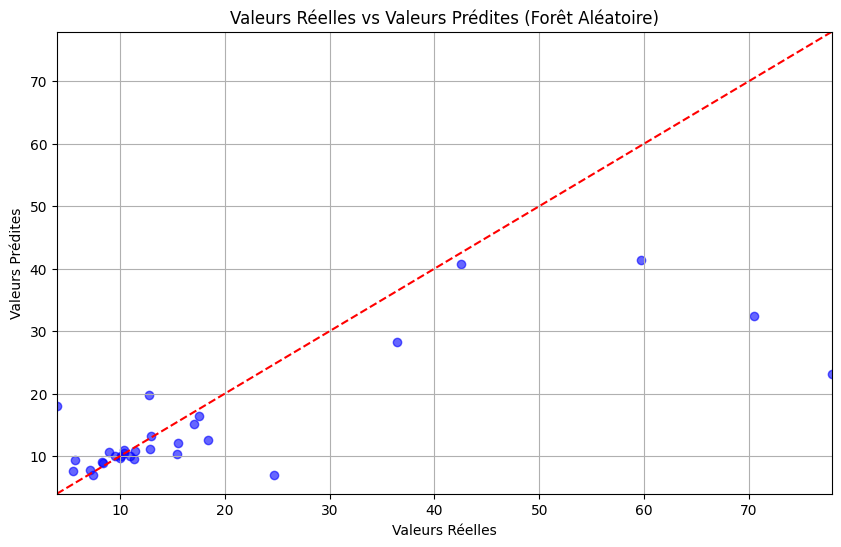

Mean Squared Error: 184.36951062803206


In [37]:
# Créer le graphique de dispersion des valeurs réelles vs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ligne d'identité
plt.title('Valeurs Réelles vs Valeurs Prédites (Forêt Aléatoire)')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.grid()
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.show()

# Affichage de l'erreur quadratique moyenne
print(f"Mean Squared Error: {mse_rf}")


### 4.4. Régression Ridge et Lasso

In [27]:
# 4.4. Régression Ridge et Lasso
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)



In [28]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

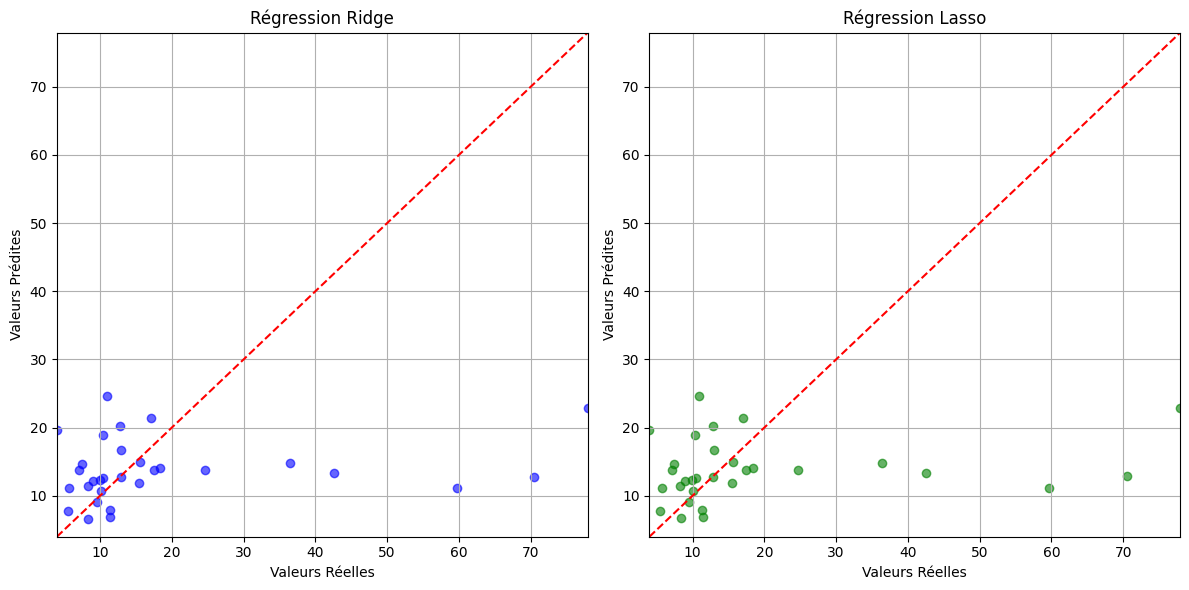

Mean Squared Error (Ridge): 366.78832533422485
Mean Squared Error (Lasso): 366.49857253764293


In [38]:
# Créer le graphique de dispersion des valeurs réelles vs prédites
plt.figure(figsize=(12, 6))

# Graphique pour la régression Ridge
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, premier sous-graphique
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ligne d'identité
plt.title('Régression Ridge')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.grid()
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())

# Graphique pour la régression Lasso
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, deuxième sous-graphique
plt.scatter(y_test, y_pred_lasso, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ligne d'identité
plt.title('Régression Lasso')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.grid()
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())

plt.tight_layout()  # Ajuste les sous-graphiques pour éviter le chevauchement
plt.show()

# Affichage des erreurs quadratiques moyennes
print(f"Mean Squared Error (Ridge): {mse_ridge}")
print(f"Mean Squared Error (Lasso): {mse_lasso}")

# 5. Comparaison des MSE (erreur quadratique moyenne)

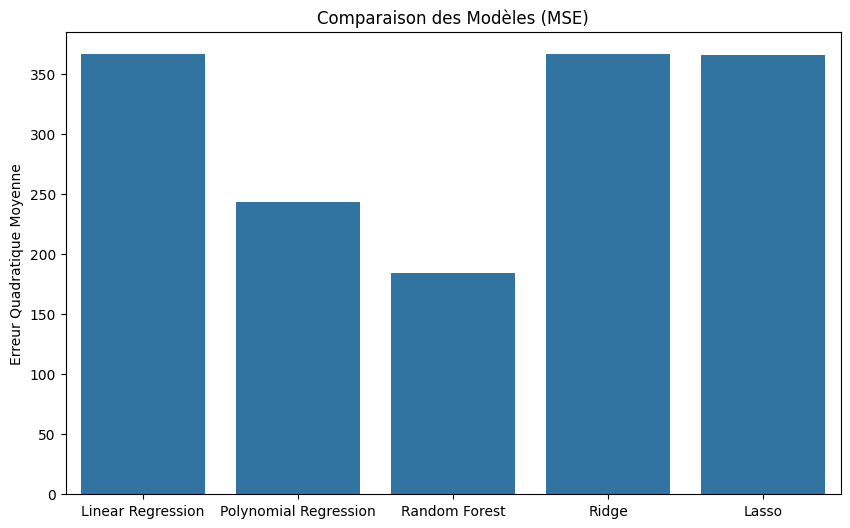

In [29]:
# 5. Comparaison des MSE (erreur quadratique moyenne)
models = ['Linear Regression', 'Polynomial Regression', 'Random Forest', 'Ridge', 'Lasso']
mse_values = [mse_lin, mse_poly, mse_rf, mse_ridge, mse_lasso]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mse_values)
plt.title('Comparaison des Modèles (MSE)')
plt.ylabel('Erreur Quadratique Moyenne')
plt.show()

# 6. Optimisation du Rendement

### Ajuster les variables pour réduire le rendement de 3 % (via Random Forest)

In [30]:

# Ajuster les variables pour réduire le rendement de 3 % (via Random Forest)
optimized_rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
optimized_rf_reg.fit(X_train, y_train * 0.97)  # Réduire la cible de 3 %
y_pred_optimized = optimized_rf_reg.predict(X_test)

### Comparer avant et après optimisation


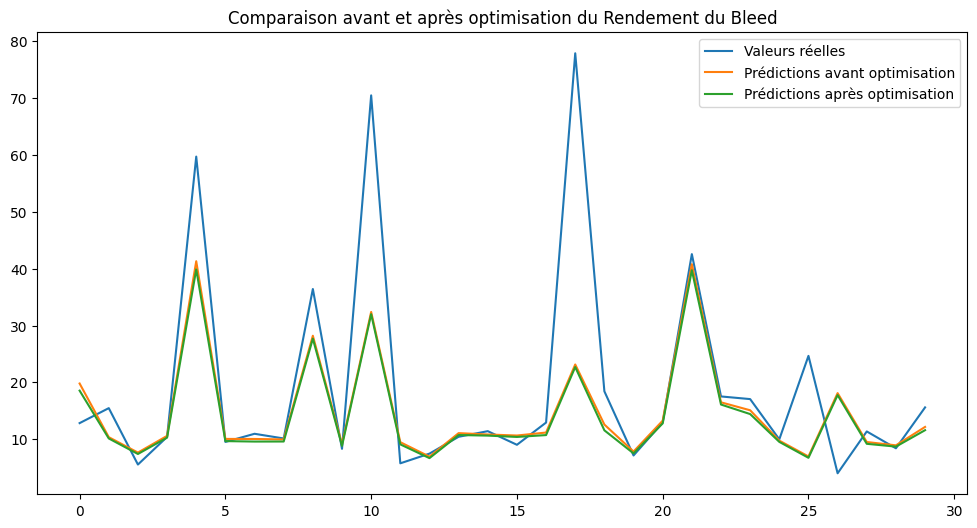

In [31]:
# Comparer avant et après optimisation
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Valeurs réelles')
plt.plot(y_pred_rf, label='Prédictions avant optimisation')
plt.plot(y_pred_optimized, label='Prédictions après optimisation')
plt.legend()
plt.title('Comparaison avant et après optimisation du Rendement du Bleed')
plt.show()

## Affichage des MSE avant et après optimisation

In [32]:
# Affichage des MSE avant et après optimisation
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
print(f"MSE avant optimisation (Random Forest): {mse_rf}")
print(f"MSE après optimisation (Random Forest): {mse_optimized}")

MSE avant optimisation (Random Forest): 184.36951062803206
MSE après optimisation (Random Forest): 189.4709702413517


In [40]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from scipy.optimize import minimize

# Extraire les variables explicatives et la cible
X = data[['CP DU GOM', 'FLASH DU KEROSENE']]
y = data['Rendement du Bleed']

# Entraîner un modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Coefficients du modèle ne sont pas disponibles avec Random Forest (non-linéaire)

# Réduction cible (réduire de 3%)
target_reduction = y.mean() * 0.97

# Fonction à minimiser (erreur par rapport à la réduction cible)
def objective_function(variables):
    cp_du_gom_value = variables[0]
    flash_du_kerosene_value = variables[1]
    
    # Faire une prédiction avec le modèle Random Forest
    prediction = rf_model.predict([[cp_du_gom_value, flash_du_kerosene_value]])[0]
    
    # Calculer la différence avec la réduction cible
    error = abs(prediction - target_reduction)
    return error

# Valeurs initiales pour CP DU GOM et FLASH DU KEROSENE
initial_values = [X['CP DU GOM'].mean(), X['FLASH DU KEROSENE'].mean()]

# Optimisation pour trouver les valeurs qui minimisent l'erreur par rapport à la réduction cible
result = minimize(objective_function, initial_values, method='Nelder-Mead')



C:\Users\odeto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\odeto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\odeto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\odeto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base

In [41]:
# Résultats optimisés
optimized_cp_du_gom = result.x[0]
optimized_flash_du_kerosene = result.x[1]

print(f"Valeurs optimisées pour atteindre une réduction de 3% :")
print(f"CP DU GOM : {optimized_cp_du_gom}")
print(f"FLASH DU KEROSENE : {optimized_flash_du_kerosene}")


Valeurs optimisées pour atteindre une réduction de 3% :
CP DU GOM : 10.137080536912752
FLASH DU KEROSENE : 54.22315436241613


: 